In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression

In [2]:
# load data
better_life = pd.read_csv('oecd_better_life_index.csv')
gdp_per_cap = pd.read_csv("IMF_GDP_per_cap.csv", sep='\t')

# print out df shapes
better_life.shape, gdp_per_cap.shape

((41, 2), (191, 7))

In [3]:
# print out the first 5 rows of oecd data
better_life.head()

,Country,Value
0,Australia,7.3
1,Austria,7.1
2,Belgium,6.9
3,Brazil,6.4
4,Canada,7.4


In [4]:
# Keep Country name and GDP columsn then print out the first 5 rows of IMF data
gdp_per_cap = gdp_per_cap[['Country', '2015']]
gdp_per_cap.head()

,Country,2015
0,Afghanistan,599.994
1,Albania,3995.383
2,Algeria,4318.135
3,Angola,4100.315
4,Antigua and Barbuda,14414.302


In [5]:
# only keep countries from IMF data that are in OECD data 
gdp_per_cap = gdp_per_cap[gdp_per_cap['Country'].isin(better_life['Country'])]

((41, 2), (40, 2))

In [6]:
# merge the 2 dfs and rename the columns
df = pd.merge(gdp_per_cap, better_life)
df.rename(columns={'2015': 'GDP per capita (USD)', 'Value': 'Life satisfaction'}, inplace=True)

,Country,GDP per capita (USD),Life satisfaction
0,Australia,50961.865,7.3
1,Austria,43724.031,7.1
2,Belgium,40106.632,6.9
3,Brazil,8669.998,6.4
4,Canada,43331.961,7.4


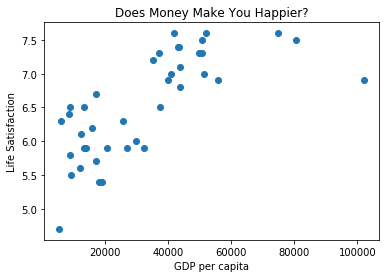

In [10]:
# create a simple scatter plot of the merged data
plt.scatter(df['GDP per capita (USD)'], df['Life satisfaction'])
plt.xlabel('GDP per capita')
plt.ylabel('Life Satisfaction')
plt.title('Does Money Make You Happier?')
plt.show();

In [49]:
# create X and y values to train model with
X = np.c_[df['GDP per capita (USD)']]
y = np.c_[df['Life satisfaction']]

In [50]:
# select and fit Linear Regression model
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
# hypothetical gdp for a made up country
new_country_gdp = [[25000]]
pred = model.predict(new_country_gdp)[0][0]

In [55]:
# print out the predicted Life satisfaction score 
print(f'Predictied life satisfaction score for new country: {round(pred, 1)}')

Predictied life satisfaction score for new country: 6.3
